## Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
train=pd.read_csv('train.csv')
train.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
train.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              398 non-null    float64
 1   mean texture             398 non-null    float64
 2   mean perimeter           398 non-null    float64
 3   mean area                398 non-null    float64
 4   mean smoothness          398 non-null    float64
 5   mean compactness         398 non-null    float64
 6   mean concavity           398 non-null    float64
 7   mean concave points      398 non-null    float64
 8   mean symmetry            398 non-null    float64
 9   mean fractal dimension   398 non-null    float64
 10  radius error             398 non-null    float64
 11  texture error            398 non-null    float64
 12  perimeter error          398 non-null    float64
 13  area error               398 non-null    float64
 14  smoothness error         3

In [5]:
train.groupby(['target']).mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.724228,21.969329,117.083960,1008.012752,0.102321,0.145465,0.162232,0.089037,0.191754,0.062196,...,21.537987,29.639329,144.101074,1480.458389,0.144248,0.377475,0.451303,0.185108,0.317526,0.090677
1,12.026474,17.855020,77.321526,453.777912,0.093067,0.081093,0.045503,0.025557,0.174108,0.063311,...,13.253791,23.306305,86.192209,548.302811,0.125353,0.183102,0.161643,0.072982,0.268236,0.079873


In [6]:
train.groupby(['target']).var()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,10.504588,14.243352,494.233615,143375.397471,0.000144,0.002466,0.005599,0.001223,0.000696,0.000045,...,19.513931,30.373363,915.987739,392278.671905,0.000435,0.025286,0.027822,0.001974,0.004148,0.000351
1,3.167220,16.338121,138.697240,17770.594631,0.000193,0.001196,0.001851,0.000262,0.000664,0.000049,...,3.926738,30.539531,182.265110,26506.399629,0.000417,0.008437,0.016075,0.001312,0.001742,0.000202


<AxesSubplot:xlabel='count', ylabel='target'>

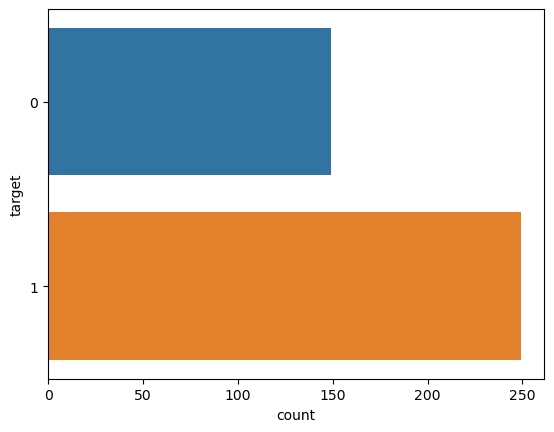

In [7]:
sns.countplot(y='target',data=train)

<AxesSubplot:>

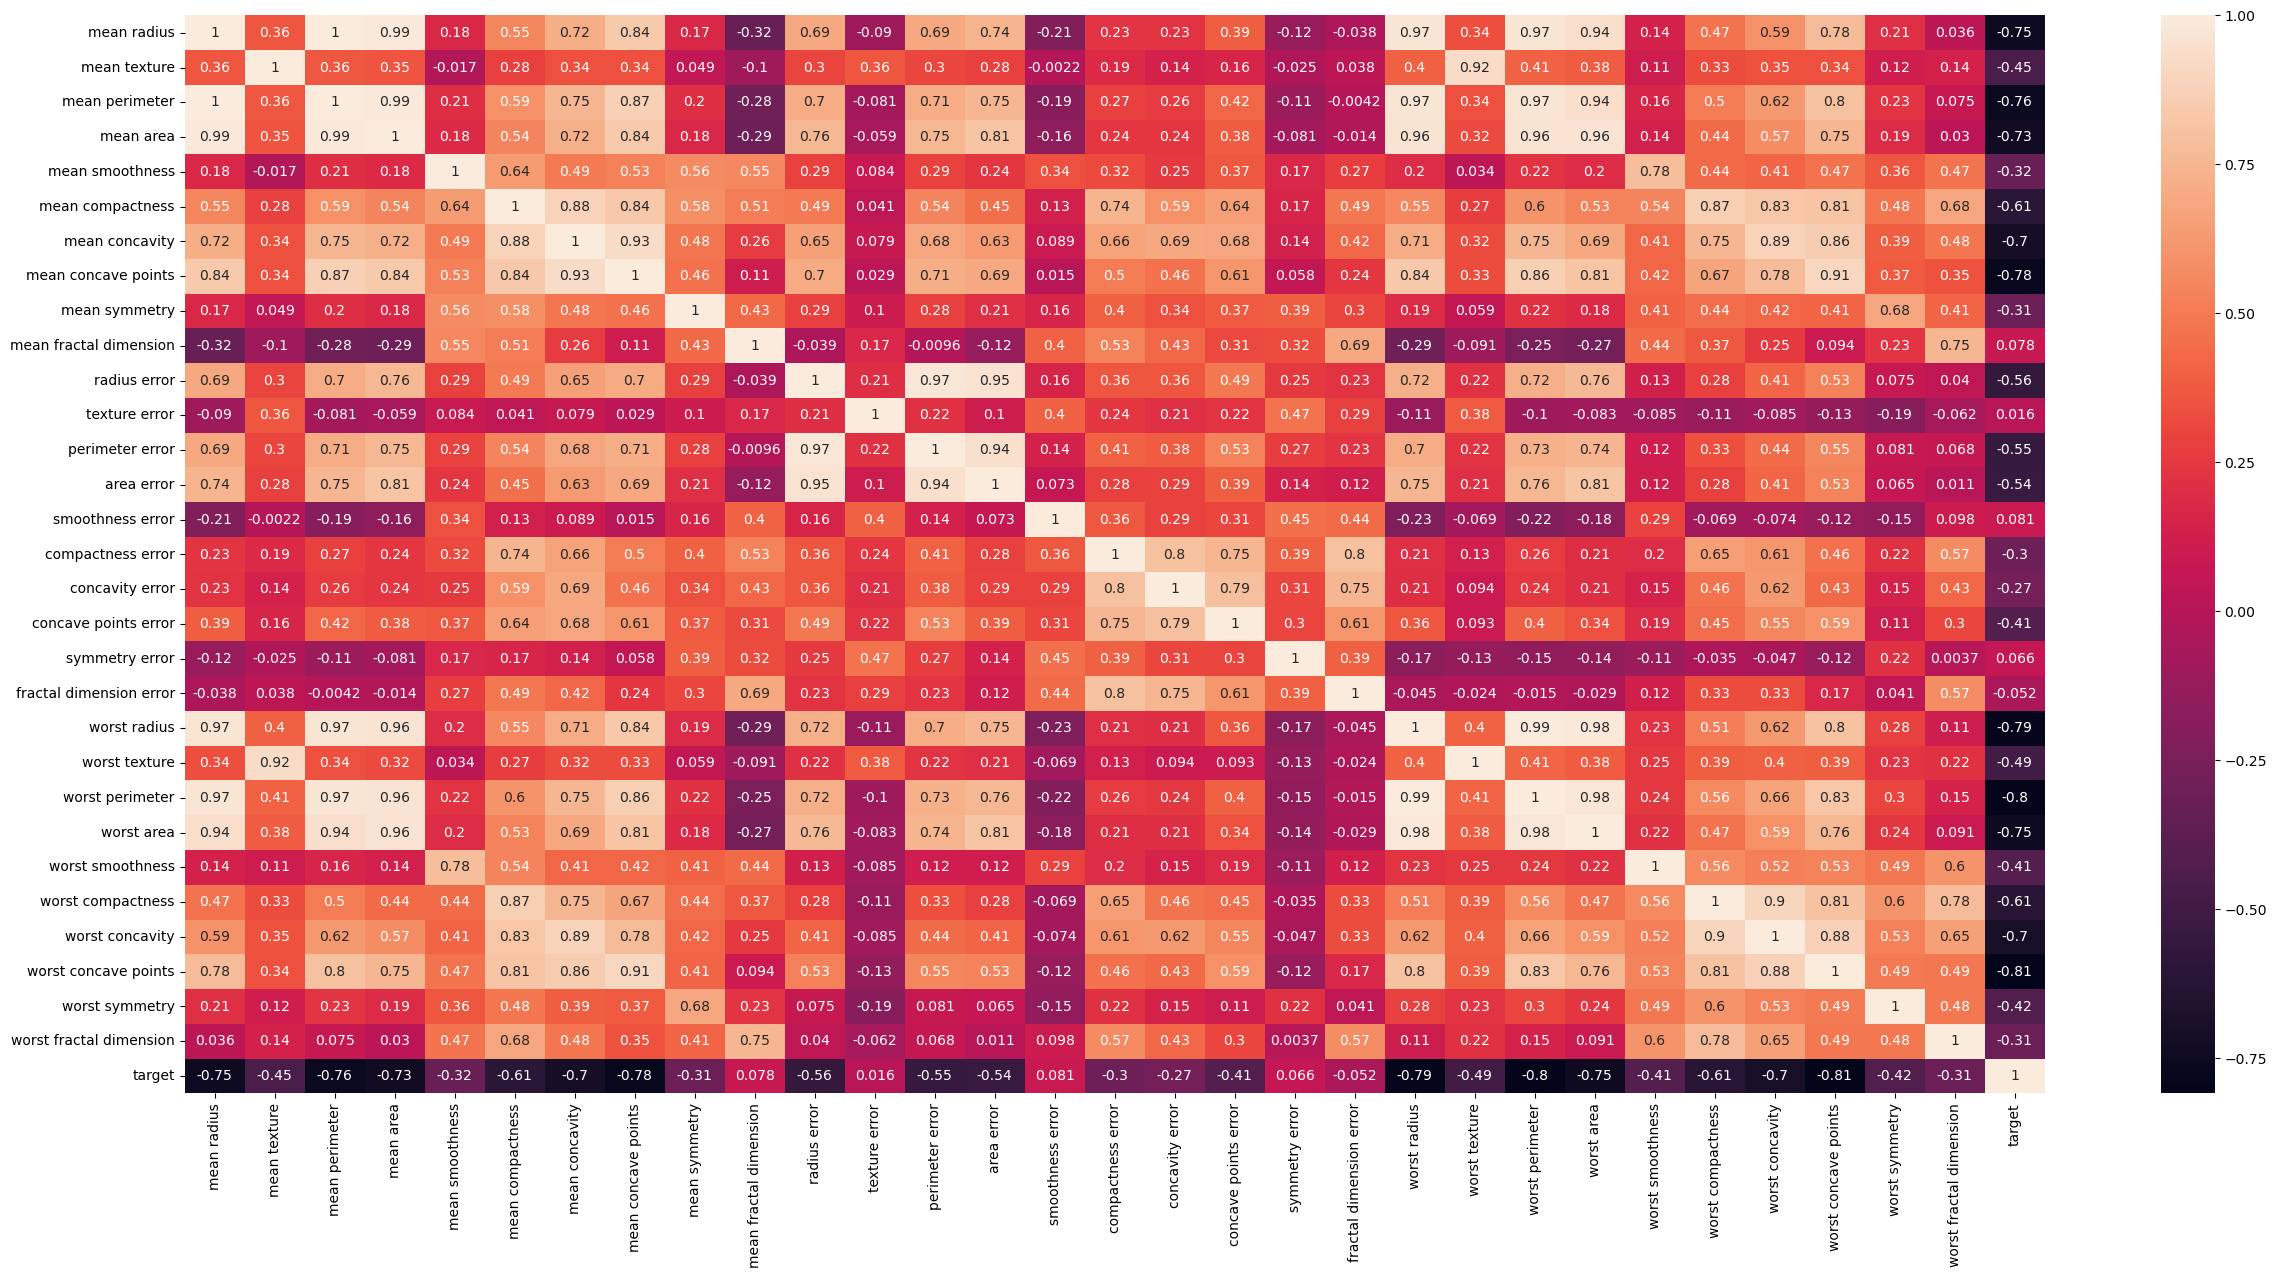

In [8]:
cor=train.corr()
plt.figure(figsize=(30,14))
sns.heatmap(cor,annot=True)

In [9]:
def cordrop(cor,thresh):
    occol=set()
    for i in range(len(cor.columns)):
        for j in range(i+1,len(cor.columns)):
            if abs(cor.iloc[i,j])>thresh:
                colnme=cor.columns[j]
                occol.add(colnme)
    return occol

In [10]:
ocdrop=cordrop(cor,0.70)
ocdrop

{'area error',
 'compactness error',
 'concave points error',
 'concavity error',
 'fractal dimension error',
 'mean area',
 'mean concave points',
 'mean concavity',
 'mean perimeter',
 'perimeter error',
 'radius error',
 'target',
 'worst area',
 'worst compactness',
 'worst concave points',
 'worst concavity',
 'worst fractal dimension',
 'worst perimeter',
 'worst radius',
 'worst smoothness',
 'worst texture'}

#### The above column names are having most of the correlation which are unnecessary so we will be dropping them

In [11]:
train.drop(ocdrop,axis=1,inplace=True)

In [12]:
train

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,texture error,smoothness error,symmetry error,worst symmetry
0,11.52,14.93,0.10130,0.07808,0.1883,0.06168,1.0380,0.006662,0.01677,0.2664
1,13.05,19.31,0.08060,0.03789,0.1819,0.05501,1.2140,0.007491,0.02190,0.2439
2,14.20,20.53,0.08931,0.11080,0.1506,0.06009,1.0180,0.004107,0.01610,0.2534
3,12.07,13.44,0.11000,0.09009,0.1657,0.06608,0.5040,0.007327,0.01962,0.2781
4,11.61,16.02,0.10880,0.11680,0.1886,0.06320,0.7339,0.005884,0.01848,0.2787
...,...,...,...,...,...,...,...,...,...,...
393,19.79,25.12,0.10150,0.15890,0.2202,0.06113,1.1990,0.005033,0.01578,0.3305
394,10.75,14.97,0.07793,0.05139,0.1399,0.05688,1.2390,0.006547,0.01671,0.2300
395,17.20,24.52,0.10710,0.18300,0.1927,0.06487,1.0410,0.005820,0.01527,0.3313
396,14.03,21.25,0.09070,0.06945,0.1517,0.05835,1.5030,0.007389,0.01263,0.2226


In [13]:
train.to_csv('featured_train.csv')
test=pd.read_csv('test.csv')

In [14]:
test.drop('Unnamed: 0',axis=1,inplace=True)
test.drop(ocdrop,axis=1,inplace=True)
test.to_csv('featured_test.csv')

In [15]:
test

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,texture error,smoothness error,symmetry error,worst symmetry
0,14.69,13.98,0.10310,0.18360,0.2086,0.07406,1.5110,0.009976,0.02653,0.2827
1,13.17,18.66,0.11580,0.12310,0.2128,0.06777,0.8937,0.006532,0.01743,0.3900
2,12.95,16.02,0.10050,0.07943,0.1730,0.06470,0.7636,0.008725,0.02625,0.3380
3,18.31,18.58,0.08588,0.08468,0.1621,0.05425,0.4757,0.002866,0.01069,0.3206
4,15.13,29.81,0.08320,0.04605,0.1852,0.05294,1.6270,0.006831,0.03151,0.3233
...,...,...,...,...,...,...,...,...,...,...
166,18.25,19.98,0.09463,0.10900,0.1794,0.05742,0.7732,0.004314,0.01369,0.3063
167,19.44,18.82,0.10890,0.14480,0.1823,0.06115,1.4080,0.005288,0.01717,0.3266
168,15.78,17.89,0.09710,0.12920,0.1842,0.06082,0.9849,0.005771,0.02008,0.3792
169,12.87,16.21,0.09425,0.06219,0.2010,0.05769,1.2190,0.005518,0.02593,0.3604
